In [26]:
import os
import numpy as np
import dill
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
def print_config(filepath):
    dirname = filepath.split("/")[-4:-1]
    print("="*50)
    print("Configuration of folder: {}".format("/".join(dirname)))
    print("="*50)
    with open(filepath, "rb") as file:
        d = dill.load(file)
    for key in d:
        print(key, d[key])
def plot_D_statistic(filepath, show=False, cut=None, save2dir=None):
    with open(filepath, 'r') as file:
        history = np.loadtxt(file, delimiter=",")
    if save2dir is not None:
        if not os.path.exists(save2dir):
            os.makedirs(save2dir)
    if cut is not None:
        history = history[:cut]
    length = len(history)
    xaxis_scale = np.arange(0, length*10, 10)
    plt.figure()
    plt.title("Critic loss")
    plt.plot(xaxis_scale, history[:, 0], label="WGAN-GP loss")
    plt.plot(xaxis_scale, history[:, 1], label="real imgs loss")
    plt.plot(xaxis_scale, history[:, 2], label="fake imgs loss")
    plt.plot(xaxis_scale, history[:, 3], label="GP penalization loss")
    plt.xlabel("Iteration")
    plt.legend(loc="best")
    if save2dir is not None:
        plt.savefig(os.path.join(save2dir, "critic_loss.png"))
    if show:
        plt.show()
    

    plt.figure()
    plt.title("Critic accuracy")
    plt.plot(xaxis_scale, history[:, 4], label="Critic acc (real)")
    plt.plot(xaxis_scale, history[:, 5], label="Critic acc (fake)")
    plt.xlabel("Iteration")
    plt.legend(loc="best")
    if save2dir is not None:
        plt.savefig(os.path.join(save2dir, "critic_acc.png"))
    if show:
        plt.show()
    

In [35]:
# path = "/home/lulin/na4/domain_adaptation/Deep-Domain-adaptation/Weights/MNIST_SEG/Exp5/config.dill"
# print_config(path)
path = "/home/lulin/na4/domain_adaptation/Deep-Domain-adaptation/Weights/WGAN_GP/Exp4_14/config.dill"
print_config(path)

Configuration of folder: Weights/WGAN_GP/Exp4_14
img_rows 32
img_cols 32
channels 3
img_shape (32, 32, 3)
num_classes 10
noise_size (100,)
lambda_adv 7
lambda_clf 1
df 64
cf 64
residual_blocks 17
use_PatchGAN False
use_Wasserstein True
critic_steps 10
GRADIENT_PENALTY_WEIGHT 5


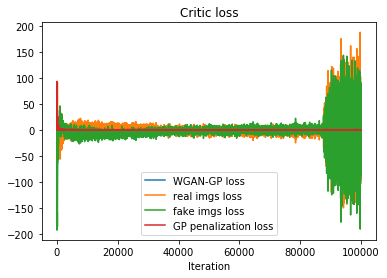

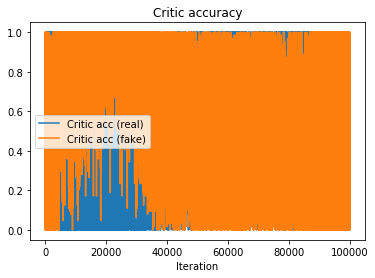

In [33]:
path = "/home/lulin/na4/domain_adaptation/Deep-Domain-adaptation/Weights/MNIST_SEG/Exp5/D_Losses.csv"
plot_D_statistic(path)

In [21]:
path = "/home/lulin/na4/domain_adaptation/Deep-Domain-adaptation/Weights/MNIST_SEG/ExpNew1/config.dill"
print_config(path)

Configuration of folder: Weights/MNIST_SEG/ExpNew1
dataset_name MNIST
img_shape (32, 32, 3)
num_classes 10
img_rows 32
img_cols 32
channels 3
noise_size (128,)
batch_size 32
lambda_adv 20
lambda_seg 1
df 64
sf 64
gf 256
opt_config_D {'lr': 1e-05, 'beta_1': 0.0, 'beta_2': 0.9}
opt_config_G {'lr': 1e-05, 'beta_1': 0.0, 'beta_2': 0.9}
normalize_G True
normalize_D False
normalize_S False
residual_blocks 2
use_PatchGAN False
use_Wasserstein True
use_He_initialization False
critic_steps 5
GRADIENT_PENALTY_WEIGHT 5
